In [605]:
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as pickle
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
# from sklearn.preprocessing import MinMaxScaler



In [606]:
df = pd.read_csv('../../algoRev1/mockData/profilesNoBio.csv')
df2 = pd.read_csv('../../algoRev1/mockData/profilesNoBio.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df2 = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# df = pd.read_csv('../../algoRev1/mockData/mockData.csv')
# df = pd.read_csv('../../data/cleanData/oneEncodedDiscord.csv')

df

,Year,Major_Dept,Ambition,Goals,Music,Sports,Friday_Nights,School_balance,Movie_Genres,Social_Style,Transfer
0,4,8,3,1,4,1,2,1,7,3,2
1,3,3,1,2,8,1,1,2,4,2,1
2,1,7,2,2,2,10,1,3,11,2,2
3,4,5,1,1,8,3,2,2,6,3,2
4,2,4,2,1,3,9,2,2,7,1,2
...,...,...,...,...,...,...,...,...,...,...,...
670,1,5,1,2,5,9,2,3,6,2,2
671,4,1,2,2,6,3,1,3,9,3,2
672,2,4,2,1,3,9,2,2,4,1,1
673,3,3,2,2,1,7,2,2,1,2,1


In [607]:
# df = df[['Bios']].join(
#               pd.DataFrame(
#           scaler.fit_transform(
#                                df.drop(columns='Bios',axis=1)), 
#                                index=df.index))

# df.head()

In [608]:
ss = preprocessing.StandardScaler()
ss.fit(df2)
df2 = ss.fit_transform(df2)
df2 = pd.DataFrame(df2, columns=['Movie_Genres', 'Sports', 'Major_Dept', 'Year', 'Ambition', 'Goals', 'Music', 'Friday_Nights', 'School_balance', 'Social_Style', 'Transfer'])

<AxesSubplot:title={'center':'After Standard Scaling'}, xlabel='Year', ylabel='Density'>

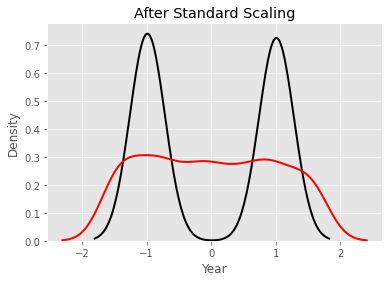

In [609]:
ax3 = plt.axes()

ax3.set_title('After Standard Scaling') 
sns.kdeplot(df2['Year'], ax = ax3, color ='black') 
sns.kdeplot(df2['Goals'], ax = ax3, color ='red') 


In [610]:

# Instantiating the Scaler
scaler = StandardScaler()
# scaler = MinMaxScaler()

for col in df.columns: 
    print(col) 

# Scaling the categories then replacing the old values

# df = df[['Movie_Genres', 'Sports', 'Major_Dept', 'Year', 'Ambition', 'Goals', 'Music', 'Friday_Nights', 'School_balance', 'Social_Style', 'Transfer']] .join(
#               pd.DataFrame(
#           scaler.fit_transform(df.drop(columns=df[['Movie_Genres', 'Sports', 'Major_Dept', 'Year', 'Ambition', 'Goals', 'Music', 'Friday_Nights', 'School_balance', 'Social_Style', 'Transfer']],axis=1))))
df = pd.DataFrame(ss.fit_transform(df))

# print('----------------------------------------------------------------------------') 
# for col in df.columns: 
#     print(col) 
print(scaler)
df

Year
Major_Dept
Ambition
Goals
Music
Sports
Friday_Nights
School_balance
Movie_Genres
Social_Style
Transfer
StandardScaler()


,0,1,2,3,4,5,6,7,8,9,10
0,1.341791,1.528966,1.275932,-0.989683,-0.519782,-1.490924,0.995565,-1.240246,0.242068,1.160692,1.013423
1,0.458172,-0.645606,-1.163882,1.010425,0.885035,-1.490924,-1.004454,0.035922,-0.682816,-0.037270,-0.986754
2,-1.309064,1.094051,0.056025,1.010425,-1.222191,1.595060,-1.004454,1.312090,1.475247,-0.037270,1.013423
3,1.341791,0.224223,-1.163882,-0.989683,0.885035,-0.805150,0.995565,0.035922,-0.066226,1.160692,1.013423
4,-0.425446,-0.210692,0.056025,-0.989683,-0.870987,1.252173,0.995565,0.035922,0.242068,-1.235231,1.013423
...,...,...,...,...,...,...,...,...,...,...,...
670,-1.309064,0.224223,-1.163882,1.010425,-0.168578,1.252173,0.995565,1.312090,-0.066226,-0.037270,1.013423
671,1.341791,-1.515435,0.056025,1.010425,0.182626,-0.805150,-1.004454,1.312090,0.858658,1.160692,1.013423
672,-0.425446,-0.210692,0.056025,-0.989683,-0.870987,1.252173,0.995565,0.035922,-0.682816,-1.235231,-0.986754
673,0.458172,-0.645606,0.056025,1.010425,-1.573395,0.566399,0.995565,0.035922,-1.607700,-0.037270,-0.986754


## --- Vectorization ---

This cell has the code for instantiating the Vectorizer, experimenting with both

Vectorization is transforming text to a vector. Takes every unique word and makes it its own column that tracks the count number


In [611]:
# # Implementing CountVectorizer. 

# vectorizer = CountVectorizer()
# #vectorizer = TfidfVectorizer()

# # Fitting the vectorizer to the Bios
# x = vectorizer.fit_transform(df['Bios'])

# # Creating a new DF that contains the vectorized words
# df_wrds = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names())

# # Concating the words DF with the original DF
# new_df = pd.concat([df, df_wrds], axis=1)

# new_df.drop('Bios', axis=1, inplace=True)
# # new_df.drop('personal_qualities', axis=1, inplace=True)
# # new_df.drop('friend_qualities', axis=1, inplace=True)

In [612]:
# for col in new_df.columns: 
#     print(col) 
# new_df

In [613]:
new_df = df

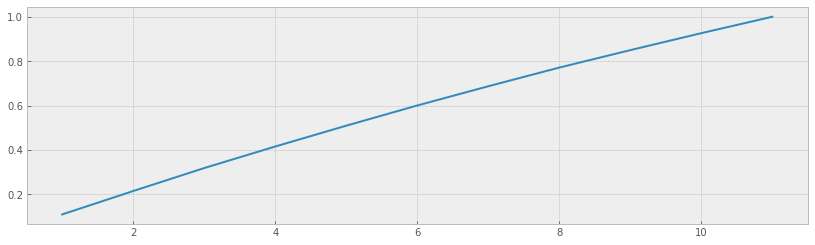

Number features: 10
Total Variance Explained: 0.9999999999999998
[[ 1.37454971 -0.13147289 -1.78313536 ...  1.07706632 -0.49352557
   1.003394  ]
 [-0.17896062  1.30813565  0.9366869  ... -1.76346536  0.88496213
  -0.04160289]
 [-2.50737437 -0.93775644 -0.85400921 ... -0.155359   -0.35561418
   0.37416837]
 ...
 [ 1.20172622 -1.33154823  1.00940985 ...  0.81759403  0.53562162
  -0.4126319 ]
 [ 1.57829699 -0.26889153  0.36627992 ... -0.48231741  0.52900655
   1.49413467]
 [-1.40033851 -0.04208172 -0.43152604 ... -1.72643697 -0.41887326
   1.6251219 ]]
0.9261476025450881


In [614]:
# Importing the library
from sklearn.decomposition import PCA

# Instantiating PCA
pca = PCA()

# Fitting and Transforming the DF
df_pca = pca.fit_transform(new_df)

# Plotting to determine how many features should the dataset be reduced to
plt.style.use("bmh")
plt.figure(figsize=(14,4))
plt.plot(range(1,new_df.shape[1]+1), pca.explained_variance_ratio_.cumsum())
plt.show()

# Finding the exact number of features that explain at least 95% of the variance in the dataset
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_95 = len(total_explained_variance[total_explained_variance>=.95])
n_to_reach_95 = new_df.shape[1] - n_over_95

# Printing out the number of features needed to retain 95% variance
print(f"Number features: {n_to_reach_95}\nTotal Variance Explained: {total_explained_variance[n_to_reach_95]}")

# Reducing the dataset to the number of features determined before
pca = PCA(n_components=n_to_reach_95)

# Fitting and transforming the dataset to the stated number of features and creating a new DF
df_pca = pca.fit_transform(new_df)
print(df_pca)
# Seeing the variance ratio that still remains after the dataset has been reduced
print(pca.explained_variance_ratio_.cumsum()[-1])


In [615]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,1.341791,1.528966,1.275932,-0.989683,-0.519782,-1.490924,0.995565,-1.240246,0.242068,1.160692,1.013423
1,0.458172,-0.645606,-1.163882,1.010425,0.885035,-1.490924,-1.004454,0.035922,-0.682816,-0.037270,-0.986754
2,-1.309064,1.094051,0.056025,1.010425,-1.222191,1.595060,-1.004454,1.312090,1.475247,-0.037270,1.013423
3,1.341791,0.224223,-1.163882,-0.989683,0.885035,-0.805150,0.995565,0.035922,-0.066226,1.160692,1.013423
4,-0.425446,-0.210692,0.056025,-0.989683,-0.870987,1.252173,0.995565,0.035922,0.242068,-1.235231,1.013423
...,...,...,...,...,...,...,...,...,...,...,...
670,-1.309064,0.224223,-1.163882,1.010425,-0.168578,1.252173,0.995565,1.312090,-0.066226,-0.037270,1.013423
671,1.341791,-1.515435,0.056025,1.010425,0.182626,-0.805150,-1.004454,1.312090,0.858658,1.160692,1.013423
672,-0.425446,-0.210692,0.056025,-0.989683,-0.870987,1.252173,0.995565,0.035922,-0.682816,-1.235231,-0.986754
673,0.458172,-0.645606,0.056025,1.010425,-1.573395,0.566399,0.995565,0.035922,-1.607700,-0.037270,-0.986754


## -- Evaluation Metrics for Clustering --

Figuring out the optimal number of clusters using Silhouette Coef and the Davies-Bouldin Score. 

SC: higher the better, where 1 is the best and -1 is the worst. 

DB: lower the better

The cell below will generate a list of evaluation scores for all possible k values

In [616]:
# Setting the amount of clusters to test out
cluster_cnt = [i for i in range(2, 20, 1)]

# Establishing empty lists to store the scores for the evaluation metrics
s_scores = []

db_scores = []

# Looping through different iterations for the number of clusters
for i in cluster_cnt:
    
    # Hierarchical Agglomerative Clustering with different number of clusters
    hac = AgglomerativeClustering(n_clusters=i)
    hac.fit(df_pca)
    
    cluster_assignments = hac.labels_
    
    ## KMeans Clustering with different number of clusters
    #k_means = KMeans(n_clusters=i)
    
    #k_means.fit(df_pca)
    
    #cluster_assignments = k_means.predict(df_pca)
    
    # Appending the scores to the empty lists    
    s_scores.append(silhouette_score(df_pca, cluster_assignments))
    
    db_scores.append(davies_bouldin_score(df_pca, cluster_assignments))

## --- Plotting the scores ---

Max Value:
Cluster #     Cluster Score
19       0.069971

Min Value:
Cluster #    Cluster Score
3       0.036708


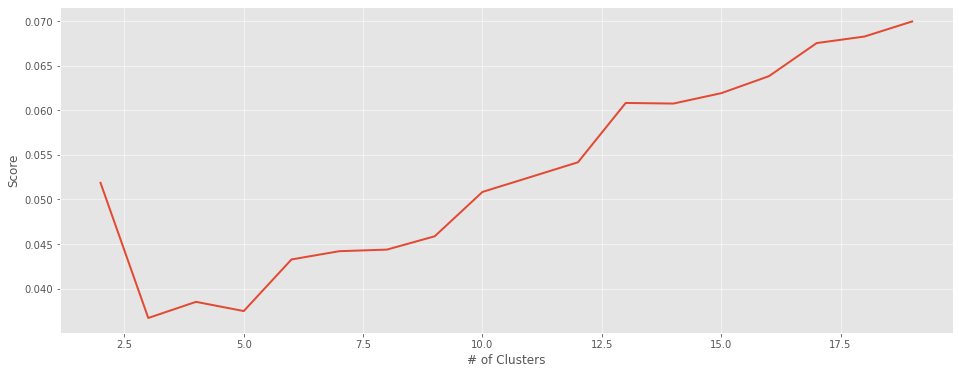

In [617]:
def plot_evaluation(y, x=cluster_cnt):
    """
    Plots the scores of a set evaluation metric. Prints out the max and min values of the evaluation scores.
    """
    
    # Creating a DataFrame for returning the max and min scores for each cluster
    df = pd.DataFrame(columns=['Cluster Score'], index=[i for i in range(2, len(y)+2)])
    df['Cluster Score'] = y
    
    print('Max Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].max()])
    print('\nMin Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].min()])
    
    # Plotting out the scores based on cluster count
    plt.figure(figsize=(16,6))
    plt.style.use('ggplot')
    plt.plot(x,y)
    plt.xlabel('# of Clusters')
    plt.ylabel('Score')
    plt.show()
    
# Running the function on the list of scores
plot_evaluation(s_scores)
# the higher the better (1 : best)


Max Value:
Cluster #    Cluster Score
2       4.250754

Min Value:
Cluster #     Cluster Score
19       2.058653


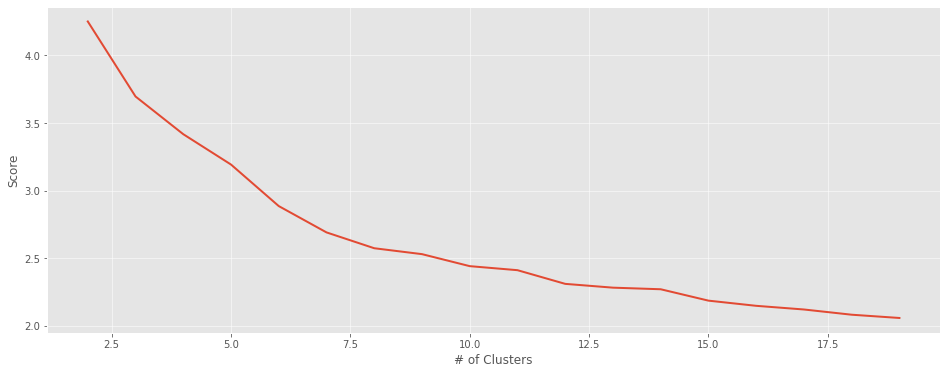

In [618]:
plot_evaluation(db_scores)
# the lower the better

## --- Running HAC ---

In [619]:
# Instantiating HAC
hac = AgglomerativeClustering(n_clusters=19)

# Fitting
hac.fit(df_pca)

# Getting cluster assignments
cluster_assignments = hac.labels_
print('len', len(cluster_assignments))

# Unscaling the categories then replacing the scaled values
df = pd.DataFrame(ss.inverse_transform(df)

# Assigning the clusters to each profile
df['Cluster #'] = cluster_assignments

# Viewing the dating profiles with cluster assignments
df

len 675


,0,1,2,3,4,5,6,7,8,9,10,Cluster #
0,4.0,8.0,3.0,1.0,4.0,1.0,2.0,1.0,7.0,3.0,2.0,4
1,3.0,3.0,1.0,2.0,8.0,1.0,1.0,2.0,4.0,2.0,1.0,10
2,1.0,7.0,2.0,2.0,2.0,10.0,1.0,3.0,11.0,2.0,2.0,8
3,4.0,5.0,1.0,1.0,8.0,3.0,2.0,2.0,6.0,3.0,2.0,4
4,2.0,4.0,2.0,1.0,3.0,9.0,2.0,2.0,7.0,1.0,2.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...
670,1.0,5.0,1.0,2.0,5.0,9.0,2.0,3.0,6.0,2.0,2.0,12
671,4.0,1.0,2.0,2.0,6.0,3.0,1.0,3.0,9.0,3.0,2.0,6
672,2.0,4.0,2.0,1.0,3.0,9.0,2.0,2.0,4.0,1.0,1.0,9
673,3.0,3.0,2.0,2.0,1.0,7.0,2.0,2.0,1.0,2.0,1.0,4


In [620]:
print(df.columns)
df.columns=['Year','Major_Dept','Ambition','Goals','Music','Sports','Friday_Nights','School_balance','Movie_Genres','Social_Style','Transfer']

df.to_csv('surabhi_res.csv')



Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 'Cluster #'], dtype='object')


ValueError: Length mismatch: Expected axis has 12 elements, new values have 11 elements

## --- 5 clusters ---

In [598]:
rslt_df = df[df['Cluster #'] == 0]
rslt_df

# year mostly 4 (senior), mostly business  

,0,1,2,3,4,5,6,7,8,9,10,Cluster #
19,4.0,4.0,3.0,1.0,10.0,1.0,1.0,1.0,1.0,1.0,2.0,0
42,2.0,1.0,2.0,1.0,2.0,3.0,1.0,3.0,3.0,2.0,2.0,0
46,4.0,2.0,1.0,1.0,9.0,2.0,1.0,1.0,10.0,3.0,2.0,0
49,3.0,2.0,2.0,1.0,1.0,7.0,1.0,2.0,9.0,3.0,1.0,0
81,2.0,1.0,3.0,1.0,1.0,3.0,1.0,1.0,6.0,3.0,1.0,0
89,3.0,5.0,1.0,1.0,4.0,3.0,1.0,2.0,4.0,2.0,2.0,0
104,3.0,3.0,1.0,1.0,1.0,5.0,1.0,2.0,5.0,3.0,2.0,0
110,1.0,1.0,3.0,1.0,9.0,4.0,1.0,1.0,10.0,2.0,1.0,0
123,3.0,1.0,2.0,1.0,7.0,8.0,1.0,2.0,4.0,3.0,1.0,0
128,2.0,4.0,1.0,1.0,4.0,5.0,1.0,1.0,2.0,2.0,2.0,0


In [599]:
rslt_df = df[df['Cluster #'] == 1]
rslt_df 


,0,1,2,3,4,5,6,7,8,9,10,Cluster #
12,1.0,2.0,2.0,2.0,10.0,3.0,1.0,2.0,8.0,1.0,2.0,1
64,2.0,1.0,3.0,1.0,1.0,4.0,2.0,1.0,9.0,1.0,2.0,1
87,2.0,2.0,1.0,2.0,8.0,1.0,1.0,3.0,3.0,1.0,2.0,1
126,1.0,2.0,1.0,1.0,1.0,3.0,1.0,1.0,10.0,1.0,2.0,1
132,1.0,1.0,2.0,1.0,10.0,5.0,1.0,3.0,3.0,1.0,2.0,1
169,2.0,4.0,1.0,1.0,9.0,5.0,1.0,2.0,4.0,2.0,2.0,1
190,1.0,2.0,2.0,2.0,7.0,6.0,1.0,2.0,5.0,1.0,2.0,1
196,2.0,2.0,2.0,1.0,5.0,1.0,1.0,1.0,9.0,1.0,2.0,1
207,3.0,3.0,1.0,1.0,9.0,5.0,1.0,2.0,7.0,2.0,2.0,1
238,1.0,2.0,1.0,1.0,7.0,1.0,2.0,3.0,9.0,2.0,2.0,1


In [600]:
rslt_df = df[df['Cluster #'] == 2]
rslt_df 
# music usually > 5, humour = 3 mostly, entertainment, alot more kindness

,0,1,2,3,4,5,6,7,8,9,10,Cluster #
5,3.0,8.0,1.0,1.0,8.0,9.0,1.0,2.0,5.0,2.0,2.0,2
25,3.0,6.0,3.0,1.0,9.0,7.0,1.0,2.0,10.0,3.0,2.0,2
26,3.0,2.0,3.0,1.0,7.0,7.0,1.0,3.0,9.0,1.0,2.0,2
53,3.0,5.0,2.0,1.0,5.0,4.0,2.0,3.0,9.0,1.0,2.0,2
60,3.0,2.0,1.0,1.0,6.0,10.0,1.0,2.0,11.0,2.0,2.0,2
82,3.0,6.0,3.0,2.0,7.0,9.0,1.0,2.0,1.0,2.0,2.0,2
92,3.0,2.0,2.0,1.0,8.0,9.0,1.0,3.0,7.0,2.0,2.0,2
94,3.0,6.0,2.0,2.0,9.0,8.0,1.0,2.0,9.0,1.0,2.0,2
95,3.0,5.0,3.0,1.0,5.0,4.0,2.0,2.0,8.0,2.0,2.0,2
109,4.0,6.0,1.0,2.0,10.0,10.0,1.0,3.0,7.0,1.0,2.0,2


In [601]:
rslt_df = df[df['Cluster #'] == 3]
rslt_df 

,0,1,2,3,4,5,6,7,8,9,10,Cluster #
11,2.0,6.0,3.0,2.0,1.0,8.0,2.0,1.0,10.0,2.0,1.0,3
18,2.0,2.0,3.0,2.0,6.0,1.0,1.0,1.0,9.0,3.0,1.0,3
27,1.0,7.0,3.0,2.0,3.0,10.0,2.0,2.0,4.0,3.0,1.0,3
35,1.0,4.0,3.0,2.0,3.0,6.0,2.0,2.0,9.0,3.0,1.0,3
41,1.0,7.0,3.0,2.0,6.0,3.0,2.0,1.0,6.0,1.0,2.0,3
51,1.0,3.0,3.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,3
73,1.0,3.0,2.0,2.0,6.0,2.0,2.0,2.0,10.0,3.0,1.0,3
91,2.0,7.0,3.0,2.0,3.0,9.0,2.0,2.0,5.0,3.0,1.0,3
105,3.0,7.0,3.0,2.0,9.0,6.0,2.0,2.0,10.0,3.0,1.0,3
107,2.0,5.0,3.0,2.0,3.0,6.0,2.0,1.0,11.0,1.0,1.0,3


In [602]:
rslt_df = df[df['Cluster #'] == 4]
rslt_df 

# very close match of the qualities and entertainment

,0,1,2,3,4,5,6,7,8,9,10,Cluster #
0,4.0,8.0,3.0,1.0,4.0,1.0,2.0,1.0,7.0,3.0,2.0,4
3,4.0,5.0,1.0,1.0,8.0,3.0,2.0,2.0,6.0,3.0,2.0,4
22,3.0,5.0,3.0,2.0,6.0,5.0,2.0,1.0,2.0,3.0,2.0,4
29,4.0,2.0,3.0,1.0,3.0,10.0,2.0,2.0,5.0,3.0,2.0,4
43,4.0,3.0,3.0,1.0,5.0,4.0,1.0,2.0,4.0,3.0,2.0,4
56,3.0,3.0,2.0,2.0,7.0,3.0,2.0,1.0,10.0,2.0,2.0,4
67,4.0,7.0,2.0,1.0,2.0,3.0,2.0,2.0,4.0,2.0,2.0,4
122,4.0,1.0,1.0,2.0,3.0,3.0,2.0,2.0,10.0,3.0,2.0,4
159,2.0,2.0,3.0,2.0,3.0,3.0,2.0,2.0,2.0,3.0,2.0,4
163,4.0,4.0,1.0,1.0,8.0,4.0,2.0,2.0,9.0,3.0,2.0,4


## --- 3 clusters ---

In [603]:
# Not the best because I personally din't see much difference in clusters

In [604]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(rslt_df[['Music', 'Year']], method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

KeyError: "None of [Index(['Music', 'Year'], dtype='object')] are in the [columns]"

In [522]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')

y_hc=hc.fit_predict(rslt_df[['Music', 'Year']])

In [523]:
plt.scatter(rslt_df[y_hc==0, 0], rslt_df[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(rslt_df[y_hc==1, 0], rslt_df[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(rslt_df[y_hc==2, 0], rslt_df[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(rslt_df[y_hc==3, 0], rslt_df[y_hc==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(rslt_df[y_hc==4, 0], rslt_df[y_hc==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()

TypeError: '(array([False,  True,  True, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False,  True, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False,  True, False, False, False, False,  True, False,
        True, False, False, False, False]), 0)' is an invalid key